# Emotion Detection on Face data using CNN

### 1. Simple CNN Model
### 2. CNN using Transfer Learning
#### 2.1 Using ResNet architecture and Data Augmentation
#### 2.2 Using MobileNet without regularization and Data Augmentation
#### 2.3 Using MobileNet with regularization and Data Augmentation
### 3. Dataset Enhancement using Conditional GAN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing necessary libraries


In [2]:
import os
os.chdir('/content/drive/My Drive/mtech/deeplearning/Project/')
#os.listdir()

In [3]:
pip install split-folders

In [49]:
import os
import cv2
import math
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten, Dense, GlobalAvgPool2D, GlobalMaxPool2D, GlobalAveragePooling2D, GlobalMaxPooling2D, Dropout,Conv2D,BatchNormalization,MaxPool2D
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers, optimizers
from keras.utils import np_utils
import splitfolders 

### Splitting Dataset into Train and Test folders

In [8]:
splitfolders.ratio('CKPlus_250/', output="output", seed=1337, ratio=(.8, 0,0.2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 12 files [00:00, 119.08 files/s]
Copying files: 16 files [00:00, 52.10 files/s] 
Copying files: 27 files [00:00, 61.85 files/s]
Copying files: 33 files [00:00, 47.44 files/s]
Copying files: 44 files [00:00, 56.90 files/s]
Copying files: 51 files [00:00, 48.55 files/s]
Copying files: 64 files [00:00, 59.29 files/s]
Copying files: 72 files [00:01, 49.77 files/s]
Copying files: 84 files [00:01, 59.91 files/s]
Copying files: 92 files [00:01, 51.21 files/s]
Copying files: 102 files [00:01, 48.16 files/s]
Copying files: 113 files [00:01, 57.49 files/s]
Copying files: 121 files [00:02, 47.79 files/s]
Copying files: 133 files [00:02, 58.19 files/s]
Copying files: 141 files [00:02, 62.64 files/s]
Copying files: 153 files [00:02, 71.98 files/s]
Copying files: 162 files [00:02, 57.65 files/s]
Copying files: 172 files [00:02, 63.10 files/s]
Copying files: 184 files [00:02, 73.18 files/s]
Copying files: 193 files [00:03, 58.94 files/s]
Copyi

### Dataset generation for MobileNet

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    zca_whitening=False)

In [24]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [25]:
train_set = train_data_gen.flow_from_directory('output/train',
                                              target_size= (224,224),
                                              batch_size= 10,
                                              class_mode='categorical',
                                              
                                              )

Found 199 images belonging to 7 classes.


In [26]:
test_set = train_data_gen.flow_from_directory('output/test',
                                              target_size= (224,224),
                                              batch_size= 10,
                                              class_mode='categorical',
                                              
                                              )

Found 51 images belonging to 7 classes.


## 1. Simple CNN model

In [50]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224, 224,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 128)     204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 128)    

In [52]:
model.compile(
    optimizer = 'adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

mod1 = model.fit(train_set, epochs=50, batch_size=10, verbose= 1,validation_data = test_set)

Epoch 1/50
20/20 [==============================] - 15s 494ms/step - loss: 10.6031 - accuracy: 0.1206 - val_loss: 67.2188 - val_accuracy: 0.1765
Epoch 2/50
20/20 [==============================] - 5s 270ms/step - loss: 10.0592 - accuracy: 0.2714 - val_loss: 69.6373 - val_accuracy: 0.1765
Epoch 3/50
20/20 [==============================] - 5s 270ms/step - loss: 10.1841 - accuracy: 0.2261 - val_loss: 30.0329 - val_accuracy: 0.1765
Epoch 4/50
20/20 [==============================] - 5s 268ms/step - loss: 9.7279 - accuracy: 0.2915 - val_loss: 20.7061 - val_accuracy: 0.1176
Epoch 5/50
20/20 [==============================] - 5s 270ms/step - loss: 9.2283 - accuracy: 0.3116 - val_loss: 20.5697 - val_accuracy: 0.1765
Epoch 6/50
20/20 [==============================] - 5s 268ms/step - loss: 8.8274 - accuracy: 0.3116 - val_loss: 12.6712 - val_accuracy: 0.2157
Epoch 7/50
20/20 [==============================] - 5s 268ms/step - loss: 8.2728 - accuracy: 0.3568 - val_loss: 9.7793 - val_accuracy: 0.2

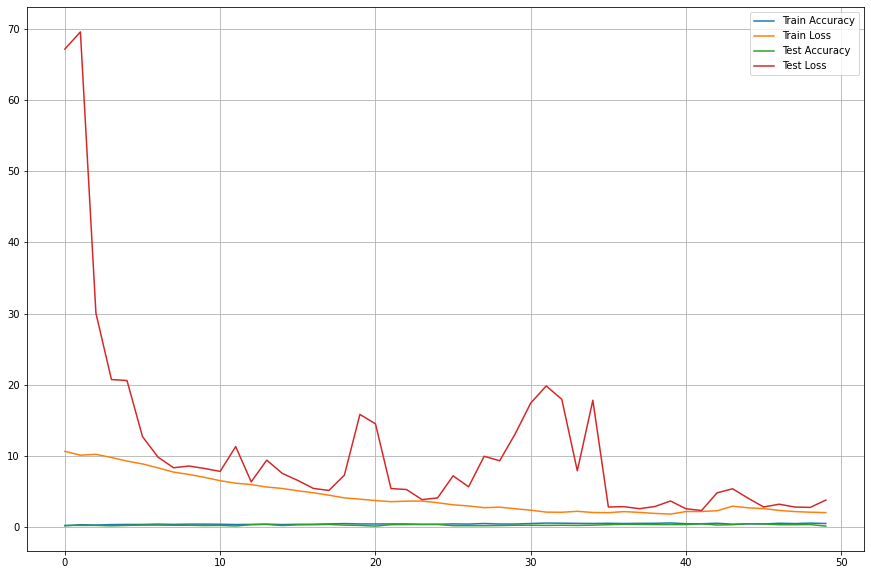

In [54]:
plt.figure(figsize=(15,10))
plt.plot(mod1.history['accuracy'], label = 'Train Accuracy')
plt.plot(mod1.history['loss'], label = 'Train Loss')
plt.plot(mod1.history['val_accuracy'], label = 'Test Accuracy')
plt.plot(mod1.history['val_loss'], label = 'Test Loss')
plt.grid()
plt.legend();

## 2. CNN using Transfer Learning


#### 2.1 Using ResNet architecture and Data Augmentation

In [56]:
model_resnet = tf.keras.applications.ResNet50(weights='imagenet',input_shape=(224,224,3),include_top=False)

for layer in model_resnet.layers[71:] :
  layer.trainable = True
for layer in model_resnet.layers:
  print(layer.name,layer.trainable)

fine_transfer_model = Sequential([model_resnet,
                             GlobalAveragePooling2D(),
                             Dense(512,activation='relu'),
                             Dense(256,activation='relu'),
                             Dense(128,activation='relu'),
                             Dense(64,activation='relu'),
                             
                             Dense(32,activation='relu'),

                             Dense(7,activation='softmax')])
fine_transfer_model.summary()

94773248/94765736 [==============================] - 1s 0us/step
input_2 True
conv1_pad True
conv1_conv True
conv1_bn True
conv1_relu True
pool1_pad True
pool1_pool True
conv2_block1_1_conv True
conv2_block1_1_bn True
conv2_block1_1_relu True
conv2_block1_2_conv True
conv2_block1_2_bn True
conv2_block1_2_relu True
conv2_block1_0_conv True
conv2_block1_3_conv True
conv2_block1_0_bn True
conv2_block1_3_bn True
conv2_block1_add True
conv2_block1_out True
conv2_block2_1_conv True
conv2_block2_1_bn True
conv2_block2_1_relu True
conv2_block2_2_conv True
conv2_block2_2_bn True
conv2_block2_2_relu True
conv2_block2_3_conv True
conv2_block2_3_bn True
conv2_block2_add True
conv2_block2_out True
conv2_block3_1_conv True
conv2_block3_1_bn True
conv2_block3_1_relu True
conv2_block3_2_conv True
conv2_block3_2_bn True
conv2_block3_2_relu True
conv2_block3_3_conv True
conv2_block3_3_bn True
conv2_block3_add True
conv2_block3_out True
conv3_block1_1_conv True
conv3_block1_1_bn True
conv3_block1_1_relu 

In [57]:
fine_transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mod2 = fine_transfer_model.fit(train_set, epochs=50, batch_size=10, verbose= 1,validation_data = test_set)

Epoch 1/50
20/20 [==============================] - 18s 492ms/step - loss: 1.9249 - accuracy: 0.2412 - val_loss: 594.8587 - val_accuracy: 0.1765
Epoch 2/50
20/20 [==============================] - 7s 333ms/step - loss: 1.9639 - accuracy: 0.1960 - val_loss: 5851.5991 - val_accuracy: 0.1765
Epoch 3/50
20/20 [==============================] - 7s 336ms/step - loss: 1.8456 - accuracy: 0.3116 - val_loss: 6.9047 - val_accuracy: 0.1765
Epoch 4/50
20/20 [==============================] - 7s 333ms/step - loss: 1.7462 - accuracy: 0.3568 - val_loss: 99.9369 - val_accuracy: 0.1176
Epoch 5/50
20/20 [==============================] - 7s 333ms/step - loss: 1.7697 - accuracy: 0.2915 - val_loss: 299.5946 - val_accuracy: 0.1765
Epoch 6/50
20/20 [==============================] - 7s 331ms/step - loss: 1.6196 - accuracy: 0.3166 - val_loss: 7448.8911 - val_accuracy: 0.1765
Epoch 7/50
20/20 [==============================] - 7s 331ms/step - loss: 1.7920 - accuracy: 0.3266 - val_loss: 64.1875 - val_accuracy: 

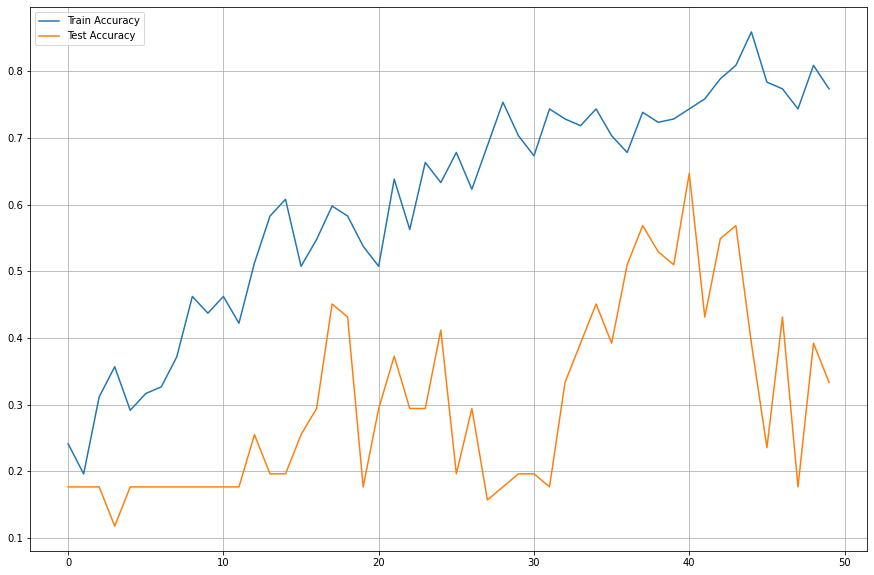

In [81]:
plt.figure(figsize=(15,10))
plt.plot(mod2.history['accuracy'], label = 'Train Accuracy')
#plt.plot(mod2.history['loss'], label = 'Train Loss')
plt.plot(mod2.history['val_accuracy'], label = 'Test Accuracy')
#plt.plot(mod2.history['val_loss'], label = 'Test Loss')
plt.legend()
plt.grid();

#### 2.2 Using MobileNet without regularization 

Model Definition

In [71]:
mobile_net = MobileNet(
    input_shape = (224,224,3),
    include_top = False,
    weights = "imagenet",
    classes = 7
)

x = mobile_net.layers[-14].output
global_pool = GlobalMaxPool2D(name="global_pool")(x)
out = Dense(7, activation="softmax", name="out_layer")(global_pool)

model = Model(inputs=mobile_net.input, outputs=out)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [72]:
# MAKING FEW LAYERS TRAINABLE
for layer in model.layers[:15]:
    layer.trainable = False

In [74]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
mod3 = model.fit_generator(train_set, 
                        steps_per_epoch = 199//10,
                        epochs = 50,
                        validation_data = test_set,
                        validation_steps = 51//10 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
19/19 [==============================] - 8s 245ms/step - loss: 3.9779 - accuracy: 0.2063 - val_loss: 4.2655 - val_accuracy: 0.1800
Epoch 2/50
19/19 [==============================] - 4s 208ms/step - loss: 1.4259 - accuracy: 0.5132 - val_loss: 4.0456 - val_accuracy: 0.1600
Epoch 3/50
19/19 [==============================] - 4s 211ms/step - loss: 1.0130 - accuracy: 0.6614 - val_loss: 5.2256 - val_accuracy: 0.2000
Epoch 4/50
19/19 [==============================] - 4s 211ms/step - loss: 0.9087 - accuracy: 0.6842 - val_loss: 5.8291 - val_accuracy: 0.3000
Epoch 5/50
19/19 [==============================] - 4s 209ms/step - loss: 0.7919 - accuracy: 0.7513 - val_loss: 3.2313 - val_accuracy: 0.3800
Epoch 6/50
19/19 [==============================] - 4s 210ms/step - loss: 0.4228 - accuracy: 0.8413 - val_loss: 3.2281 - val_accuracy: 0.4200
Epoch 7/50
19/19 [==============================] - 4s 208ms/step - loss: 0.2971 - accuracy: 0.8995 - val_loss: 2.5630 - val_accuracy: 0.4800
Epoch 

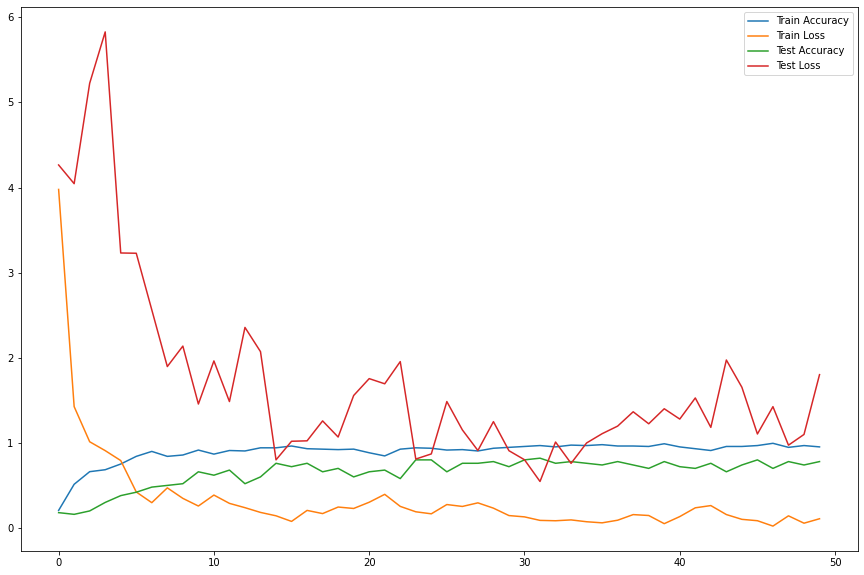

In [76]:
plt.figure(figsize=(15,10))
plt.plot(mod3.history['accuracy'], label = 'Train Accuracy')
plt.plot(mod3.history['loss'], label = 'Train Loss')
plt.plot(mod3.history['val_accuracy'], label = 'Test Accuracy')
plt.plot(mod3.history['val_loss'], label = 'Test Loss')
plt.legend();

#### 2.3 Using MobileNet with regularization and Data Augmentation

In [77]:
mobile_net = MobileNet(
    input_shape = (224,224,3),
    include_top = False,
    weights = "imagenet",
    classes = 7
)

x = mobile_net.layers[-14].output
global_pool = GlobalMaxPool2D(name="global_pool")(x)
x = Dense(128, activation="relu", name="dense")(global_pool)
x = Dropout(0.2)(x)
out = Dense(7, activation="softmax", name="out_layer")(x)

model = Model(inputs=mobile_net.input, outputs=out)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [78]:
# MAKING FEW LAYERS TRAINABLE
for layer in model.layers[:15]:
    layer.trainable = False

In [79]:
def train_and_test_loop2(iterations, lr, verb=True,optimizer = 'adam'):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    

    early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0008,
    patience=5,
    verbose=1,
    restore_best_weights=True)

    checkpoint_path = "/content/drive/My Drive/mtech/Project/Save_Model/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path) 

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

    lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    min_delta=0.0001,
    factor=0.25,
    patience=4,
    min_lr=1e-7,
    verbose=1)

    callbacks = [
    early_stopping,
    lr_scheduler,
    model_checkpoint_callback]
    
    #sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    
    # Fit the model
    model.fit(train_set, epochs=iterations, batch_size=10, verbose= 1,validation_data = test_set)
    [loss1,train_accuracy] = model.evaluate(train_set, verbose=0)
    [loss,test_accuracy] = model.evaluate(test_set, verbose=0)
    
    return train_accuracy,test_accuracy,model,loss1,loss

In [ ]:
lr = [9.765624781721272e-06, 3.9062499126885086e-05,0.00015624999650754035,0.0006249999860301614,0.0024999999441206455]
optimizer = ['adam','sgd','rmsprop']

for l in lr:
    for op in optimizer:
        train_accuracy,test_accuracy,model,train_loss,test_loss = train_and_test_loop2(50, l, False,op)
        print("train_acc: {0},test_acc: {1},train_loss: {2},test_loss: {3}, lr: {4}, optimizer :{5}\n".format(train_accuracy,test_accuracy,train_loss,test_loss , l, op))
        
    #lr = math.pow(10, np.random.uniform(-6.0, -4.0))
    #Lambda = math.pow(10, np.random.uniform(-2,-1))

Epoch 1/50
20/20 [==============================] - 7s 223ms/step - loss: 0.6608 - accuracy: 0.7789 - val_loss: 0.8044 - val_accuracy: 0.7451
Epoch 2/50
20/20 [==============================] - 4s 201ms/step - loss: 0.6628 - accuracy: 0.7387 - val_loss: 0.9882 - val_accuracy: 0.6471
Epoch 3/50
20/20 [==============================] - 4s 198ms/step - loss: 0.4948 - accuracy: 0.8191 - val_loss: 1.2867 - val_accuracy: 0.5882
Epoch 4/50
20/20 [==============================] - 4s 199ms/step - loss: 0.4657 - accuracy: 0.8492 - val_loss: 1.9466 - val_accuracy: 0.5294
Epoch 5/50
20/20 [==============================] - 4s 207ms/step - loss: 0.4982 - accuracy: 0.8241 - val_loss: 2.4492 - val_accuracy: 0.3725
Epoch 6/50
20/20 [==============================] - 4s 208ms/step - loss: 0.4738 - accuracy: 0.8442 - val_loss: 2.2323 - val_accuracy: 0.4902
Epoch 7/50
20/20 [==============================] - 4s 206ms/step - loss: 0.5213 - accuracy: 0.8141 - val_loss: 1.3043 - val_accuracy: 0.5294
Epoch 

#### Best Model among the different learning rates and optimizers

In [86]:
def train(iterations, lr, verb=True,optimizer = 'adam'):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    

    early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0008,
    patience=5,
    verbose=1,
    restore_best_weights=True)

    checkpoint_path = "/content/drive/My Drive/mtech/Project/Save_Model/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path) 

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

    lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    min_delta=0.0001,
    factor=0.25,
    patience=4,
    min_lr=1e-7,
    verbose=1)

    callbacks = [
    early_stopping,
    lr_scheduler,
    model_checkpoint_callback]
    
    #sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    
    # Fit the model
    mod4 = model.fit(train_set, epochs=iterations, batch_size=10, verbose= 1,validation_data = test_set)
    [loss1,train_accuracy] = model.evaluate(train_set, verbose=0)
    [loss,test_accuracy] = model.evaluate(test_set, verbose=0)
    
    return train_accuracy,test_accuracy,model,loss1,loss,mod4

In [87]:
lr = 0.00015624999650754035
optimizer = 'sgd'
train_accuracy,test_accuracy,model,train_loss,test_loss,mod5 = train(50,lr,True,optimizer)
#model.save_weights('checkpoints/'+'model_abc_'+str(lr)+'.h5')

Epoch 1/50
20/20 [==============================] - 6s 229ms/step - loss: 0.1261 - accuracy: 0.9598 - val_loss: 1.0084 - val_accuracy: 0.7843
Epoch 2/50
20/20 [==============================] - 4s 194ms/step - loss: 0.0664 - accuracy: 0.9749 - val_loss: 0.6613 - val_accuracy: 0.8431
Epoch 3/50
20/20 [==============================] - 4s 193ms/step - loss: 0.0834 - accuracy: 0.9648 - val_loss: 0.7043 - val_accuracy: 0.8431
Epoch 4/50
20/20 [==============================] - 4s 198ms/step - loss: 0.1416 - accuracy: 0.9548 - val_loss: 0.5230 - val_accuracy: 0.8431
Epoch 5/50
20/20 [==============================] - 4s 198ms/step - loss: 0.1054 - accuracy: 0.9648 - val_loss: 0.7498 - val_accuracy: 0.8235
Epoch 6/50
20/20 [==============================] - 4s 193ms/step - loss: 0.0823 - accuracy: 0.9698 - val_loss: 0.8794 - val_accuracy: 0.7843
Epoch 7/50
20/20 [==============================] - 4s 195ms/step - loss: 0.0947 - accuracy: 0.9598 - val_loss: 0.7069 - val_accuracy: 0.7647
Epoch 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

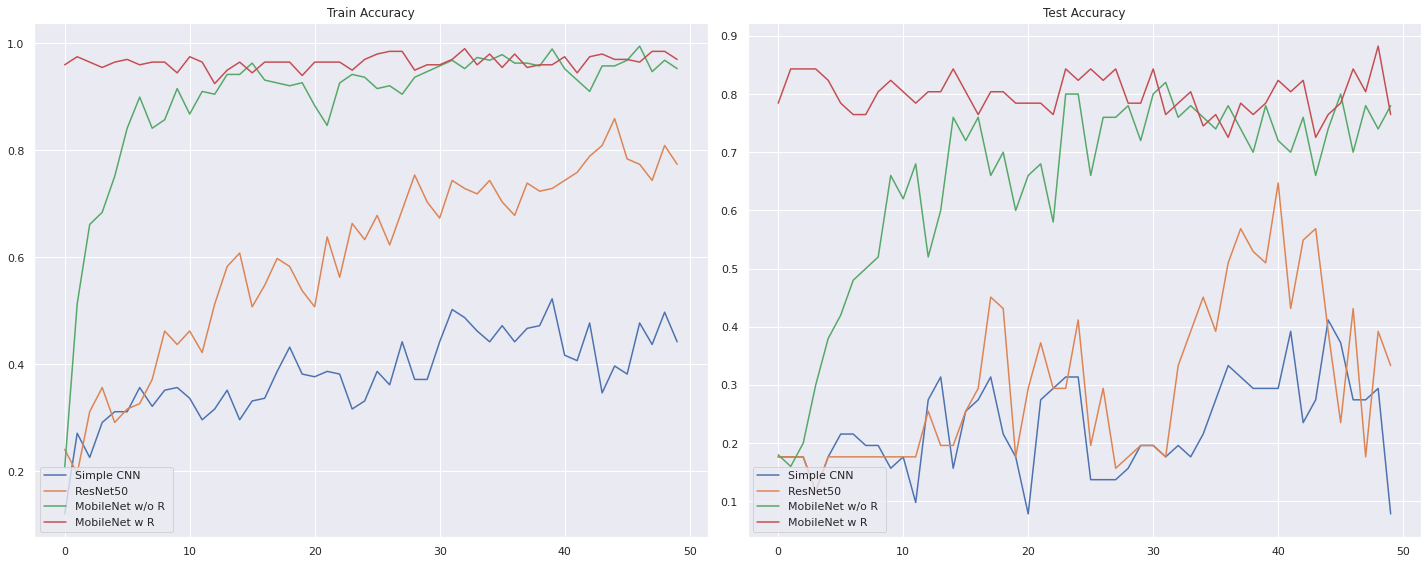

In [106]:
sns.set()
fig = plt.figure(0, (20, 8))

ax = plt.subplot(1, 2, 1)
sns.lineplot(mod1.epoch,mod1.history['accuracy'], label='Simple CNN ')
sns.lineplot (mod2.epoch,mod2.history['accuracy'], label='ResNet50 ')
sns.lineplot(mod3.epoch,mod3.history['accuracy'], label='MobileNet w/o R ')
sns.lineplot(mod5.epoch,mod5.history['accuracy'], label='MobileNet w R ')
plt.title('Train Accuracy')
plt.legend(loc='lower left')
plt.tight_layout()



ax = plt.subplot(1, 2, 2)
sns.lineplot( mod1.epoch,mod1.history['val_accuracy'], label='Simple CNN ')
sns.lineplot(mod2.epoch,mod2.history['val_accuracy'], label='ResNet50 ')
sns.lineplot(mod3.epoch, mod3.history['val_accuracy'], label='MobileNet w/o R ')
sns.lineplot(mod5.epoch,mod5.history['val_accuracy'], label='MobileNet w R ')
plt.title('Test Accuracy')
plt.legend(loc='lower left')
plt.tight_layout()

legend_out = True






/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

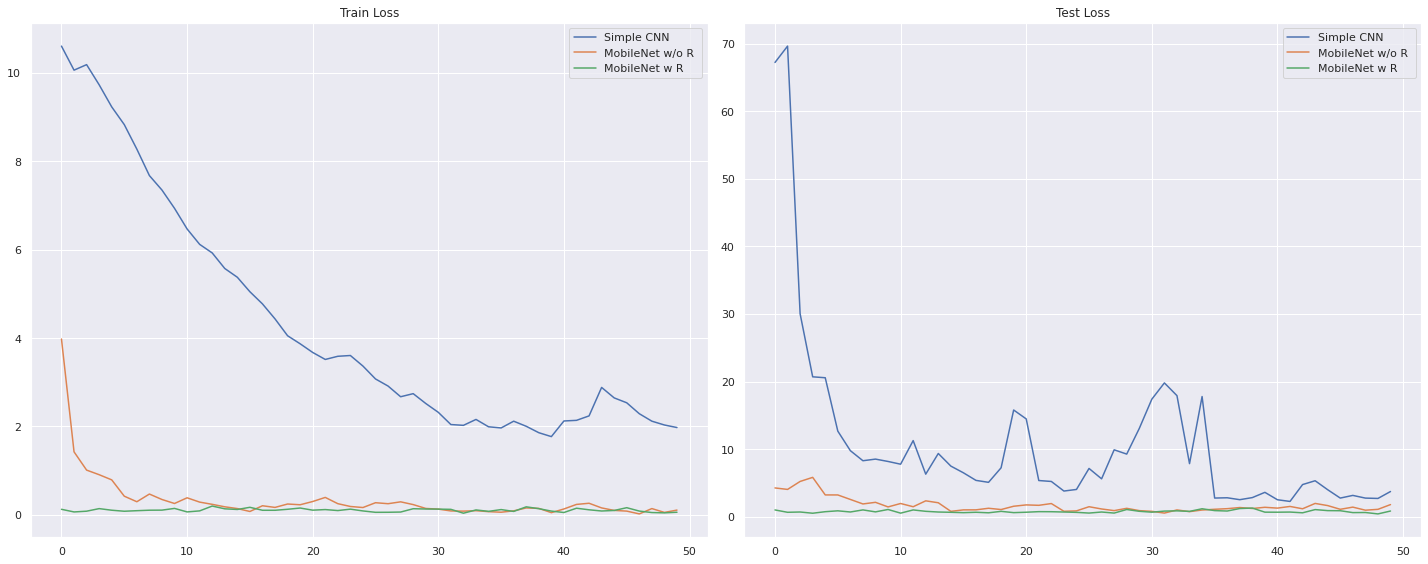

In [109]:
sns.set()
fig = plt.figure(0, (20, 8))

ax = plt.subplot(1, 2, 1)
sns.lineplot(mod1.epoch,mod1.history['loss'], label='Simple CNN ')
#sns.lineplot (mod2.epoch,mod2.history['loss'], label='ResNet50 ')
sns.lineplot(mod3.epoch,mod3.history['loss'], label='MobileNet w/o R ')
sns.lineplot(mod5.epoch,mod5.history['loss'], label='MobileNet w R ')
plt.title('Train Loss')
plt.legend(loc='upper right')
plt.tight_layout()



ax = plt.subplot(1, 2, 2)
sns.lineplot( mod1.epoch,mod1.history['val_loss'], label='Simple CNN ')
#sns.lineplot(mod2.epoch,mod2.history['val_loss'], label='ResNet50 ')
sns.lineplot(mod3.epoch, mod3.history['val_loss'], label='MobileNet w/o R ')
sns.lineplot(mod5.epoch,mod5.history['val_loss'], label='MobileNet w R ')
plt.title('Test Loss')
plt.legend(loc='upper right')
plt.tight_layout()

legend_out = True